# Case Study 3 : Data Science in NYC Taxi and Uber Data

**Required Readings:** 
* [Analyzing 1.1 Billion NYC Taxi and Uber Trips](http://toddwschneider.com/posts/analyzing-1-1-billion-nyc-taxi-and-uber-trips-with-a-vengeance/) 
* Please download the NYC taxi and Uber dataset from [here](https://github.com/toddwschneider/nyc-taxi-data).
* [TED Talks](https://www.ted.com/talks) for examples of 10 minutes talks.


** NOTE **
* Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost.

*----------------------

In [0]:
!pip install psycopg2
!pip install folium

# Problem:

Businesses use advertisement as a form of customer attraction.  However, advertising to the wrong market segment is neither useful, nor profitable.  Knowing WHERE to advertise allows businesses to make smarter investment decisions.  For this project, we specificlally consider the problem of Sports Stadium Advertisement, in the context of New York City

# Data Collection/Processing
    

In [0]:
import psycopg2
import pandas as pd

hostname = '104.196.142.102'
username = 'postgres'
password = 'password'
database = 'nyc-taxi-data'
# Simple routine to run a query on a database and print the results:

connection = psycopg2.connect( host=hostname, user=username, password=password, database=database )

def db2DataFrame(sql_query):
  res_df = pd.read_sql(sql_query, connection)
  return res_df

def doQuery( query ) :
    cur = connection.cursor()
    cur.execute( query )
    return cur

# connection.close

In [207]:
# Please upload the three Game schedule csv files which are uploaded in drive and named netsTimeRange.csv, knicksTimeRange.csv, yankeeTimeRange.csv.
# This is necessary to get the game schedule python dictionary.

from google.colab import files
uploaded = files.upload()

Saving knicksTimeRange.csv to knicksTimeRange (2).csv
Saving netsTimeRange.csv to netsTimeRange (3).csv


In [0]:
import pandas as pd
import io

# load team schedules from csv files
def loadTeamSchedules(filename):
  #team_data = pd.read_csv(io.StringIO(uploaded[filename].decode('utf-8')))
  team_data = pd.read_csv(filename) # load the schedule files as dataframe
  team_date = team_data[['Start1', 'Start2','End1','End2']] # select four colomns we needs
  # print(team_date)
  schedules = team_date.loc[(team_date['Start1'].str.contains('2015'))] # filter out other schedule data which is not in 2015
  schedule_dict = schedules.to_dict('records') # convert the dataframe as list of dictionary with each dictionary contains a schedule info
  return schedule_dict

In [1]:
'''
To use this code:
  1) choose a table name
      knicks_outgoing     # contains 2818323 items, takes 78.31s to load
      knicks_incoming     # contains 2150849 items, takes 58.17s to load
      nets_outgoing       # contains 695406  items, takes 18.45s to load
      nets_incoming       # contains 478698  items, takes 11.21s to load
      yankees_outgoing    # contains 740     items, takes  0.02s to load
      yankees_incoming    # contains 815     items, takes  0.05s to load
  2) replace the item 'table_name' with YOUR_CHOSEN_TABLE_NAME
  3) run the code & wait the alloted time
  4) the object data is a LIST containing all gps tuples corresponding to its
     name for the year 2015.  In particular, the tuples are in order of...
        [1]--> dropoff_longitude
        [2]--> dropoff_latitude
        [3]--> pickup_longitude
        [4]--> pickup_latitude
        [5]--> tip_amount
        [6]--> fare_amount
        [7]--> payment_type
        [8]--> pickup_datetime
        [9]--> dropoff_datetime
'''

"\nTo use this code:\n  1) choose a table name\n      knicks_outgoing     # contains 2818323 items, takes 78.31s to load\n      knicks_incoming     # contains 2150849 items, takes 58.17s to load\n      nets_outgoing       # contains 695406  items, takes 18.45s to load\n      nets_incoming       # contains 478698  items, takes 11.21s to load\n      yankees_outgoing    # contains 740     items, takes  0.02s to load\n      yankees_incoming    # contains 815     items, takes  0.05s to load\n  2) replace the item 'table_name' with YOUR_CHOSEN_TABLE_NAME\n  3) run the code & wait the alloted time\n  4) the object data is a LIST containing all gps tuples corresponding to its\n     name for the year 2015.  In particular, the tuples are in order of...\n        [1]--> dropoff_longitude\n        [2]--> dropoff_latitude\n        [3]--> pickup_longitude\n        [4]--> pickup_latitude\n        [5]--> tip_amount\n        [6]--> fare_amount\n        [7]--> payment_type\n        [8]--> pickup_datetime

In [214]:
# Taxi data constrained in Nets Stadiums and Nets Matches Time Schedule 
netsOutgoingResult =[]
netsIncomingResult =[]
netsSchedule = loadTeamSchedules('netsTimeRange.csv')

for i in range(0,len(netsSchedule)):
  sql_query = \
      '''
      select dropoff_longitude, dropoff_latitude, pickup_longitude, pickup_latitude, tip_amount, total_amount, payment_type, pickup_datetime, dropoff_datetime 
      from nets_outgoing 
      where pickup_datetime between \'%(End1)s\' and \'%(End2)s\'
      '''
  cursor = doQuery(sql_query % netsSchedule[i])
  data = cursor.fetchall()
  netsOutgoingResult = data + netsOutgoingResult
  
for i in range(0,len(netsSchedule)):
  sql_query = \
      '''
      select dropoff_longitude, dropoff_latitude, pickup_longitude, pickup_latitude, tip_amount, fare_amount, payment_type, pickup_datetime, dropoff_datetime
      from nets_incoming 
      where dropoff_datetime between \'%(Start1)s\' and \'%(Start2)s\'
      '''
  cursor = doQuery(sql_query % netsSchedule[i])
  data = cursor.fetchall()
  netsIncomingResult = data + netsIncomingResult
  
print(len(netsOutgoingResult))
print(len(netsIncomingResult))

4427
2373


In [215]:
# Taxi data constrained in Knicks Stadiums and Knicks Matches Time Schedule 
knicksOutgoingResult =[]
knicksIncomingResult =[]
knicksSchedule = loadTeamSchedules('knicksTimeRange.csv')

for i in range(0,len(knicksSchedule)):
  sql_query = \
      '''
      select dropoff_longitude, dropoff_latitude, pickup_longitude, pickup_latitude, tip_amount, total_amount, payment_type, pickup_datetime, dropoff_datetime 
      from knicks_outgoing 
      where pickup_datetime between \'%(End1)s\' and \'%(End2)s\'
      '''
  cursor = doQuery(sql_query % knicksSchedule[i])
  data = cursor.fetchall()
  knicksOutgoingResult = data + knicksOutgoingResult
  
for i in range(len(knicksSchedule)):
  sql_query = \
      '''
      SELECT dropoff_longitude, dropoff_latitude, pickup_longitude, pickup_latitude, tip_amount, fare_amount, payment_type, pickup_datetime, dropoff_datetime 
      from knicks_incoming
      where dropoff_datetime between \'%(Start1)s\' and \'%(Start2)s\'
      '''
  cursor = doQuery(sql_query % knicksSchedule[i])
  data = cursor.fetchall()
  knicksIncomingResult = data + knicksIncomingResult
  
print(len(knicksOutgoingResult))
print(len(knicksIncomingResult))

4413
4462


In [208]:
# Taxi data constrained in Yankees Stadiums and Yankees Matches Time Schedule 
yankeesOutgoingResult =[]
yankeesIncomingResult =[]
yankeesSchedule = loadTeamSchedules('yankeesTimeRange1.csv')

for i in range(1,len(yankeesSchedule)):
  sql_query = \
      '''
      select dropoff_longitude, dropoff_latitude, pickup_longitude, pickup_latitude, tip_amount, fare_amount, payment_type, pickup_datetime, dropoff_datetime 
      from yankees_outgoing 
      where pickup_datetime between \'%(End1)s\' and \'%(End2)s\'
      '''
  cursor = doQuery(sql_query % yankeesSchedule[i])
  data = cursor.fetchall()
  yankeesOutgoingResult = data + yankeesOutgoingResult
  
for i in range(1,len(yankeesSchedule)):
  sql_query = \
      '''
      select dropoff_longitude, dropoff_latitude, pickup_longitude, pickup_latitude, tip_amount, fare_amount, payment_type, pickup_datetime, dropoff_datetime
      from yankees_incoming 
      where dropoff_datetime between \'%(Start1)s\' and \'%(Start2)s\' 
      '''
  cursor = doQuery(sql_query % yankeesSchedule[i])
  data = cursor.fetchall()
  yankeesIncomingResult = data + yankeesIncomingResult
  
print(len(yankeesOutgoingResult))
print(len(yankeesIncomingResult))
  

0
0


# Data Exploration: Exploring the Uber/Taxi Dataset

** plot the spatial distribution of the pickup locations of 5000 Uber trips** 
* collect a set of 5000 Uber trips
* plot the distribution of the pickup locations using a scatter plot figure.

In [92]:
import pandas as pd
raw = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-apr14.csv')[0:5000]
#raw.head(5)
#len(raw)

import folium

uber5000 = folium.Map(
    location=[40.7128, -74.0060], # new york coordinates
    tiles='CartoDB dark_matter',
    zoom_start=11
)

locationlst = zip(raw['Lat'], raw['Lon'])
for l in locationlst:
    folium.Circle(location=l).add_to(uber5000)
uber5000#.save('foliumUber.html')


# The Solution: implement a data science solution to the problem you are trying to solve.

We approached the problem of advertisement location from the context of GPS bounding.  Since we have a dataset of GPS tuples, we rationalize that we can extract something reselmbling a customer home-location dataset.  We filtered rides that either arrived to, or left from popular stadiums, and andalyzed their destinations/origins.  To add more legitimicy to this, we also only considered tuples that were in an appropriate time range.

Briefly describe the idea of your solution to the problem in the following cell:

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
trip_knicks_outgoing = knicksOutgoingResult
trip_nets_outgoing = netsOutgoingResult

In [0]:
df_knicks_result = pd.read_csv("knicksTimeRange (2).csv")
df_nets_result = pd.read_csv("netsTimeRange (3).csv")

In [0]:
df_knicks_outgoing = pd.DataFrame(trip_knicks_outgoing)
df_nets_outgoing = pd.DataFrame(trip_nets_outgoing)

df_knicks_outgoing = df_knicks_outgoing.rename(columns={0: 'dropoff_longitude', 1: 'dropoff_latitude',2:'pickup_longitude',3:'pickup_latitude',4:'tip_amount',5:'total_amount',6:'payment_type',7:'pickup_datetime',8:'dropoff_datetime'})
df_nets_outgoing = df_nets_outgoing.rename(columns={0: 'dropoff_longitude', 1: 'dropoff_latitude',2:'pickup_longitude',3:'pickup_latitude',4:'tip_amount',5:'total_amount',6:'payment_type',7:'pickup_datetime',8:'dropoff_datetime'})

In [0]:
''' 
  TIP ANALYSIS:
  
  In our analysis, we mainly focus on the relationsip between tips and game results.
  Here we define tip ratio as the amount of tips divided by the total payment other than tips, fares, tolls, mta_tax, improvement_surcharge and 
  ehail_fee.

'''

# define a function to calculte the tip ratio
def fun_tipRatio(dataset):
  
  # Delete the trips paid by cash & Delete the trips whose fare_amount is zero
  df = dataset[dataset.payment_type != '2']
  df = df[df.total_amount != 0]
  df_new = df[['dropoff_datetime','total_amount','tip_amount']]
  
  df_new = df_new.assign(tip_ratio=np.nan)
  
  for i in range(len(df_new)):
    df_new.iat[i,3] = df_new.iat[i,2] / (df_new.iat[i,1] - df_new.iat[i,2])
    
  return df_new


# Define a function to fugure out weather this game won or lost
def fun_addresult(dataframe_tip,dataframe_result):
  df_new = dataframe_tip
  df_new = df_new.assign(result="")
  
  for i in range(len(df_new)):
    time_1 = df_new.iat[i,0]
    time_1 = time_1.strftime('%y-%m-%d')
    
    for j in range(len(dataframe_result)):
      time_2 = dataframe_result.iat[j,-1][2:10]
      
      if time_1 == time_2:
        df_new.iat[i,4] = dataframe_result.iat[j,-3]
        
  return df_new


# Define a fucntion to capture the frequency 
def fun_Count(dataframe):
  
  count_less10 = 0
  count_10_20 = 0
  count_20_30 = 0
  count_30_40 = 0
  count_above40 = 0
  
  for i in range(len(dataframe)):
    if dataframe.iat[i,-2] < 0.1:
      count_less10 += 1
      
    elif dataframe.iat[i,-2] >= 0.1 and dataframe.iat[i,-2] < 0.2:
      count_10_20 += 1
      
    elif dataframe.iat[i,-2] >= 0.2 and dataframe.iat[i,-2] < 0.3:
      count_20_30 += 1
      
    elif dataframe.iat[i,-2] >= 0.3 and dataframe.iat[i,-2] < 0.4:
      count_30_40 += 1
      
    else:
      count_above40 += 1
     
  count_less10 = round(float(count_less10) / len(dataframe),3) * 10
  count_10_20 = round(float(count_10_20) / len(dataframe),3) * 10
  count_20_30 = round(float(count_20_30) / len(dataframe),3) * 10
  count_30_40 = round(float(count_30_40) / len(dataframe),3) * 10
  count_above40 = round(float(count_above40) / len(dataframe),3) * 10
  count = [count_less10,count_10_20,count_20_30,count_30_40,count_above40]
  return count
  


In [0]:
df_knicks_tipRatio = fun_tipRatio(df_knicks_outgoing)
df_nets_tipRatio = fun_tipRatio(df_nets_outgoing)

In [0]:
knicks_tipAnalysis = fun_addresult(df_knicks_tipRatio,df_knicks_result)
nets_tipAnalysis = fun_addresult(df_nets_tipRatio,df_nets_result)

In [0]:
knicks_W = knicks_tipAnalysis[knicks_tipAnalysis['result'] == 'W']
knicks_L = knicks_tipAnalysis[knicks_tipAnalysis['result'] == 'L']

nets_W = nets_tipAnalysis[nets_tipAnalysis['result'] == 'W']
nets_L = nets_tipAnalysis[nets_tipAnalysis['result'] == 'L']

In [0]:
knicks_count_W = fun_Count(knicks_W)
knicks_count_L = fun_Count(knicks_L)

nets_count_W = fun_Count(nets_W)
nets_count_L = fun_Count(nets_L)

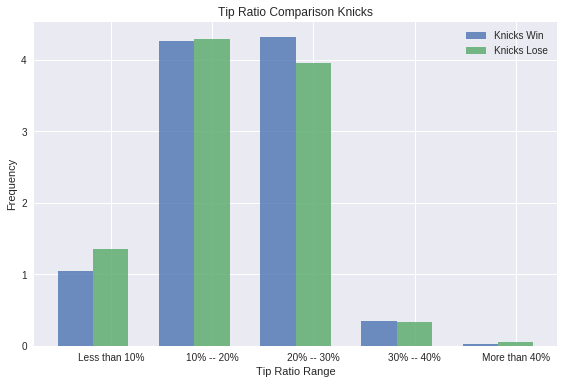

In [230]:
n_groups = 5
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, knicks_count_W, bar_width,
                 alpha=opacity,
                 label='Knicks Win')
 
rects2 = plt.bar(index + bar_width, knicks_count_L, bar_width,
                 alpha=opacity,
                 label='Knicks Lose')
 
plt.xlabel('Tip Ratio Range')
plt.ylabel('Frequency')
plt.title('Tip Ratio Comparison Knicks')
plt.xticks(index + bar_width, ('Less than 10%', '10% -- 20%', '20% -- 30%', '30% -- 40%', 'More than 40%'))
plt.legend()
 
plt.tight_layout()
plt.show()

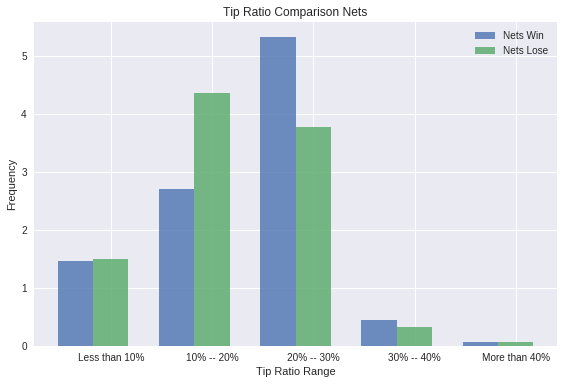

In [231]:
n_groups = 5
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, nets_count_W, bar_width,
                 alpha=opacity,
                 label='Nets Win')
 
rects2 = plt.bar(index + bar_width, nets_count_L, bar_width,
                 alpha=opacity,
                 label='Nets Lose')
 
plt.xlabel('Tip Ratio Range')
plt.ylabel('Frequency')
plt.title('Tip Ratio Comparison Nets')
plt.xticks(index + bar_width, ('Less than 10%', '10% -- 20%', '20% -- 30%', '30% -- 40%', 'More than 40%'))
plt.legend()
 
plt.tight_layout()
plt.show()

In [0]:
tipAnalysis = pd.concat([knicks_tipAnalysis, nets_tipAnalysis], ignore_index=True)

# Results: summarize and visualize the results discovered from the analysis

Please use figures, tables, or videos to communicate the results with the audience.


In [85]:
# load game schedule
netsRange = loadTeamSchedules('netsTimeRange.csv')
knicksRange = loadTeamSchedules('knicksTimeRange.csv')
print len(netsRange)
print len(knicksRange)

25
25


In [0]:
# function for adding the date&time filter

def netsIncomingData(timeRange): # input is a list
  result = []
  for i in range(len(timeRange)):
    
    incomingQuery = \
      '''
      SELECT dropoff_longitude, dropoff_latitude, pickup_longitude, pickup_latitude,
      tip_amount, fare_amount, payment_type, pickup_datetime, dropoff_datetime from nets_incoming
      where dropoff_datetime between \'%(Start1)s\' and \'%(Start2)s\'
      '''
    result += doQuery(incomingQuery % timeRange[i]).fetchall()
    
  return result

def netsOutgoingData(timeRange):
  result = []
  for i in range(len(timeRange)):
    
    outgoingQuery = \
      '''
      SELECT dropoff_longitude, dropoff_latitude, pickup_longitude, pickup_latitude,
      tip_amount, fare_amount, payment_type, pickup_datetime, dropoff_datetime from nets_outgoing
      where pickup_datetime between \'%(End1)s\' and \'%(End2)s\'
      '''
    result += doQuery(outgoingQuery % timeRange[i]).fetchall()
    
  return result

def knicksIncomingData(timeRange): # input is a list
  result = []
  for i in range(len(timeRange)):
    
    incomingQuery = \
      '''
      SELECT dropoff_longitude, dropoff_latitude, pickup_longitude, pickup_latitude,
      tip_amount, fare_amount, payment_type, pickup_datetime, dropoff_datetime from knicks_incoming
      where dropoff_datetime between \'%(Start1)s\' and \'%(Start2)s\'
      '''
    result += doQuery(incomingQuery % timeRange[i]).fetchall()
    
  return result

def knicksOutgoingData(timeRange):
  result = []
  for i in range(len(timeRange)):
    
    outgoingQuery = \
      '''
      SELECT dropoff_longitude, dropoff_latitude, pickup_longitude, pickup_latitude,
      tip_amount, fare_amount, payment_type, pickup_datetime, dropoff_datetime from knicks_outgoing
      where pickup_datetime between \'%(End1)s\' and \'%(End2)s\'
      '''
    result += doQuery(outgoingQuery % timeRange[i]).fetchall()
    
  return result


In [105]:
# load data
netsIn = netsIncomingData(netsRange)
netsOut = netsOutgoingData(netsRange)

knicksIn = knicksIncomingData(knicksRange)
knicksOut = knicksOutgoingData(knicksRange)

print len(netsIn)
print len(netsOut)
print len(knicksIn)
print len(knicksOut)

2373
4427
4462
4413


In [0]:
# Get coordinates from random samples

import numpy as np
randIdx = np.random.choice(len(netsIn), 1000, replace=False)

nOutRand = [(netsOut[i][1],netsOut[i][0]) for i in randIdx]
kOutRand = [(knicksOut[i][1],knicksOut[i][0]) for i in randIdx]

nInRand = [(netsIn[i][3], netsIn[i][2]) for i in randIdx]
kInRand = [(knicksIn[i][3], knicksIn[i][2]) for i in randIdx]


In [0]:
#!pip install folium

In [119]:
# Compare Nets and Knicks incoming pickups
import folium

nkIn = folium.Map(
    location=[40.7128, -74.0060], # new york coordinates
    tiles='CartoDB dark_matter',
    zoom_start=11
)

folium.Marker(location=[40.7505, -73.9934]).add_to(nkIn) # add knicks stadium location
folium.Marker(location=[40.6828, -73.9758]).add_to(nkIn) # add nets stadium location

for n in nInRand:
  if n[0] is None:
    pass
  else:
    folium.Circle(location=n, color='#777CA8').add_to(nkIn)

for k in kInRand:
  if k[0] is None:
    pass
  else:
    folium.Circle(location=k,color='#ffb121').add_to(nkIn)
    
nkIn

In [118]:
# compare Nets and Knicks outgoing dropoffs
nkOut = folium.Map(
    location=[40.7128, -74.0060], # new york coordinates
    tiles='CartoDB dark_matter',
    zoom_start=11
)

folium.Marker(location=[40.7505, -73.9934]).add_to(nkOut) # add knicks stadium location
folium.Marker(location=[40.6828, -73.9758]).add_to(nkOut) # add nets stadium location
#folium.Marker(location=[40.8296, -73.9262]).add_to(nkOut) # add yankees stadium location

for n in nOutRand:
  if n[0] is None:
    pass
  else:
    folium.Circle(location=n,color='#777CA8').add_to(nkOut)

for k in kOutRand:
  if k[0] is None:
    pass
  else:
    folium.Circle(location=k,color='#ffb121').add_to(nkOut)
    
# for o in yOut:
#   if o[0] is None:
#     pass
#   else:
#     folium.Circle(location=o,color='#EF5B59').add_to(nkOut)

nkOut

In [117]:
# compare Nets fans pre/post game locations
# Post game locations are more likely to be home.

nInOut = folium.Map(
    location=[40.7128, -74.0060], # new york coordinates
    tiles='CartoDB dark_matter',
    zoom_start=11
)

folium.Marker(location=[40.6828, -73.9758]).add_to(nInOut) # add nets stadium location

for n in nInRand:
  if n[0] is None:
    pass
  else:
    folium.Circle(location=n,color='white').add_to(nInOut)
    
for n in nOutRand:
  if n[0] is None:
    pass
  else:
    folium.Circle(location=n,color='#777CA8').add_to(nInOut)
    
nInOut

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "jupyter notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.

* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . Each team present their case studies in class for 10 minutes.

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through Canvas, in the Assignment "Case Study 4".
        
** Note: Each team only needs to submit one submission in Canvas **


# Peer-Review Grading Template:

** Total Points: (100 points) ** Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.

Please add an "**X**" mark in front of your rating: 

For example:

*2: bad*
          
**X** *3: good*
    
*4: perfect*


    ---------------------------------
    The Problem: 
    ---------------------------------
    
    1. (10 points) how well did the team describe the problem they are trying to solve using the data? 
       0: not clear
       2: I can barely understand the problem
       4: okay, can be improved
       6: good, but can be improved
       8: very good
       10: crystal clear
    
    2. (10 points) do you think the problem is important or has a potential impact?
        0: not important at all
        2: not sure if it is important
        4: seems important, but not clear
        6: interesting problem
        8: an important problem, which I want to know the answer myself
       10: very important, I would be happy invest money on a project like this.
    
    ----------------------------------
    Data Collection and Processing:
    ----------------------------------
    
    3. (10 points) Do you think the data collected/processed are relevant and sufficient for solving the above problem? 
       0: not clear
       2: I can barely understand what data they are trying to collect/process
       4: I can barely understand why the data is relevant to the problem
       6: the data are relevant to the problem, but better data can be collected
       8: the data collected are relevant and at a proper scale
      10: the data are properly collected and they are sufficient

    -----------------------------------
    Data Exploration:
    -----------------------------------
    4. How well did the team solve the following task:
    
    (1) plot the spatial distribution of the pickup locations of 5000 Uber trips (10 points):
       0: missing answer
       4: okay, but with major problems
       7: good, but with minor problems
      10: perfect
    

    -----------------------------------
    The Solution
    -----------------------------------
    5.  how well did the team describe the solution they used to solve the problem? (10 points)
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
       10: crystal clear
       
    6. how well is the solution in solving the problem? (10 points)
       0: not relevant
       2: barely relevant to the problem
       4: okay solution, but there is an easier solution.
       6: good, but can be improved
       8: very good, but solution is simple/old
       10: innovative and technically sound
       
    7. how well did the team implement the solution in python? (10 points)
       0: the code is not relevant to the solution proposed
       2: the code is barely understandable, but not relevant
       4: okay, the code is clear but incorrect
       6: good, the code is correct, but with major errors
       8: very good, the code is correct, but with minor errors
      10: perfect 
   
    -----------------------------------
    The Results
    -----------------------------------
     8.  How well did the team present the results they found in the data? (10 points)
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
      10: crystal clear
       
     9.  How do you think of the results they found in the data?  (5 points)
       0: not clear
       1: likely to be wrong
       2: okay, maybe wrong
       3: good, but can be improved
       4: make sense, but not interesting
       5: make sense and very interesting
     
    -----------------------------------
    The Presentation
    -----------------------------------
    10. How all the different parts (data, problem, solution, result) fit together as a coherent story?  
       0: they are irrelevant
       1: I can barely understand how they are related to each other
       2: okay, the problem is good, but the solution doesn't match well, or the problem is not solvable.
       3: good, but the results don't make much sense in the context
       4: very good fit, but not exciting (the storyline can be improved/polished)
       5: a perfect story
      
    11. Did the presenter make good use of the 10 minutes for presentation?  
       0: the team didn't present
       1: bad, barely finished a small part of the talk
       2: okay, barely finished most parts of the talk.
       3: good, finished all parts of the talk, but some part is rushed
       4: very good, but the allocation of time on different parts can be improved.
       5: perfect timing and good use of time      

    12. How well do you think of the presentation (overall quality)?  
       0: the team didn't present
       1: bad
       2: okay
       3: good
       4: very good
       5: perfect


    -----------------------------------
    Overall: 
    -----------------------------------
    13. How many points out of the 100 do you give to this project in total?  Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.
    Total score:
    
    14. What are the strengths of this project? Briefly, list up to 3 strengths.
       1: 
       2:
       3:
    
    15. What are the weaknesses of this project? Briefly, list up to 3 weaknesses.
       1:
       2:
       3:
    
    16. Detailed comments and suggestions. What suggestions do you have for this project to improve its quality further.
    
    
    

    ---------------------------------
    Your Vote: 
    ---------------------------------
    1. [Overall Quality] Between the two submissions that you are reviewing, which team would you vote for a better score?  (5 bonus points)
        0: I vote the other team is better than this team
        5: I vote this team is better than the other team 
        
    2. [Presentation] Among all the teams in the presentation, which team do you think deserves the best presentation award for this case study?  
        1: Team 1
        2: Team 2
        3: Team 3
        4: Team 4
        5: Team 5
        6: Team 6
        7: Team 7
        8: Team 8
        9: Team 9


